importing Jupyter notebook from filter_results.ipynb
importing Jupyter notebook from scrape_page.ipynb
importing Jupyter notebook from generate_metrics.ipynb
importing Jupyter notebook from build_csv.ipynb
Please Enter What You Would Like to Search: red vans

Would You Like to Filter Your Results
Enter 0 For Yes And 1 For No

Response: 1

The Mean Price is $42.87
The Mean Amount of Ratings is 19969
The Mean Positive Feedback Percentage is 95.89%


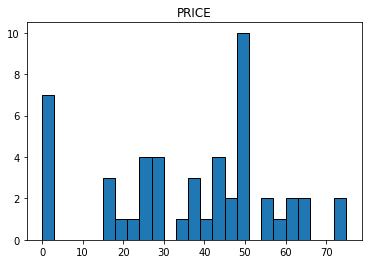

https://www.ebay.com/itm/Vans-New-Authentic-Era-Classic-Sneakers-Unisex-Canvas-Shoes/152926574649?var=452690357610&hash=item239b225839:g:AsMAAOSw5JBal0sY:sc:USPSPriorityMailPaddedFlatRateEnvelope!91709!US!-1


In [1]:
#---------------- import libraries ------------------------

import csv

#---------------- import other modules --------------------

import import_ipynb
import filter_results as fr
import scrape_page as sp
import generate_metrics as gm
import build_csv as bc
   
## ------------------ MAIN -----------------------------------

def main():
    open('things.csv', 'w').close()
    searchword = fr.get_input()
    url = sp.format_url(searchword)
    
    #build URL with filtered results by user imput
    filter_response = fr.prompt_filter()
    if(filter_response == 0):
        url = url + fr.filter_price()
        url = url + fr.filter_buying_format()

    products = sp.get_page_urls(sp.get_page(url))
    bc.label_csv()
    
    # ----------- get each product ---------------
    for i in products[0:50]:
        data = sp.group_data(sp.get_page(i), i)
        bc.get_csv(data, i)
        
    #--------------- checks -----------------
    bc.check_titles(searchword)
    bc.check_price()
    
    #----------- create metrics ----------------
    gm.frame_data(searchword)
    gm.create_histogram('PRICE')
    
    best_item_index = gm.find_best_item()
    print(products[best_item_index])
    
if __name__ == '__main__':
    main()
    